In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/0701-benchmark_dataset")

In [3]:
group_by_dataset=["dataset", "pool_size"]

In [33]:
df_datasets_s3 = []
for i in range(1, 11):
    df_dataset = extract_pandas(output_base_folder, folder_filter=f"run_{i}/*dataset*")
    df_datasets_s3.append(df_dataset)
    print(df_dataset.groupby(group_by_dataset).groups.keys())
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1210/1210 [00:01<00:00, 860.66it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1238/1238 [00:01<00:00, 968.52it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1254/1254 [00:01<00:00, 955.49it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1365/1365 [00:01<00:00, 1073.93it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1281/1281 [00:01<00:00, 1001.74it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1264/1264 [00:01<00:00, 1017.33it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1277/1277 [00:01<00:00, 1088.10it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1287/1287 [00:01<00:00, 1109.17it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:01<00:00, 905.73it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1266/1266 [00:01<00:00, 957.26it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


In [35]:
print(len(df_datasets_s3))

10


In [36]:
font_size=30
params = {'legend.fontsize': font_size,
          'figure.figsize': (20, 15),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size}

In [234]:
def plot_throughput_per_storage2(dfs, dataset, group_by: List[str], request_time=True, params=None):
#     fig, ax1 = plt.subplots(figsize=(15, 7))
    if params is not None:
        plt.rcParams.update(params)
    fig, ax1 = plt.subplots(dpi=120)
    request_times = []
    for df in dfs:
        collected = {}

        x_label = group_by[1]

        df_for_function_name = df[df["function_name"] == "__getitem__"].drop_duplicates(subset=['time_start', 'time_end'], keep="first", inplace=False) 
        df_for_function_name["request_time"] = df_for_function_name["time_end"] - df_for_function_name["time_start"]
        nodes = set(df_for_function_name["node"].drop_duplicates().tolist())
        df_grouped_by_run = df_for_function_name.groupby(["run"]).agg(
            {"time_start": "min", "time_end": "max", "len": "sum", **{k: "first" for k in group_by}}
        )
        df_grouped_by_run["runtime"] = df_grouped_by_run["time_end"] - df_grouped_by_run["time_start"]
        df_grouped_by_run["throughput [Mbit/s]"] = (df_grouped_by_run["len"] / df_grouped_by_run["runtime"] / (1024 * 1024)) * 8
        # sum of all runtimes and all downloaded data by summer over runs
        df_aggregated_over_runs = df_grouped_by_run.groupby(group_by).agg(
            **{
                "len": ("len", "sum"),
                "runtime": ("runtime", "sum"),
                "min_throughput": ("throughput [Mbit/s]", "min"),
                "max_throughput": ("throughput [Mbit/s]", "max"),
                **{k: (k, "first") for k in group_by},
            }
        )

        # https://en.wikipedia.org/wiki/Data-rate_units#Megabit_per_second
        df_aggregated_over_runs["throughput [Mbit/s]"] = (
            (df_aggregated_over_runs["len"] / df_aggregated_over_runs["runtime"] / (1024 * 1024)) * 8
        )
        df_aggregated_over_runs["min_throughput"] = df_aggregated_over_runs["min_throughput"]

        # all requests from all data
        df_aggregated_over_requests = df_for_function_name.groupby(group_by).agg(
            **{
                "min_request_time": ("request_time", "min"),
                "max_request_time": ("request_time", "max"),
                "median_request_time": ("request_time", "median"),
                "mean_request_time": ("request_time", "mean"),
                **{k: (k, "first") for k in group_by},
            }
        )

        ax1.set_ylim([0, max(200, df_grouped_by_run["throughput [Mbit/s]"].max()) + 20])
        ax2 = ax1.twinx()
        cmap = plt.cm.get_cmap("Set1")

        result = []
        # TODO loop over groups instead
        df = df_aggregated_over_runs[df_aggregated_over_runs["dataset"] == dataset]

        storage = dataset

        ax1.plot(
            df[x_label],
            df["throughput [Mbit/s]"],
            linewidth=2,
            color="blue",
            label=f"{storage} throughput",
        )
        ax1.fill_between(
            df[x_label], df["min_throughput"], df["max_throughput"], color=lighten_color(cmap(i), 0.2), alpha=0.5
        )
        ax1.set_xticks(df[x_label])

        df2 = df_aggregated_over_requests[df_aggregated_over_requests["dataset"] == dataset]
        request_times.append(df2["median_request_time"].to_list())
        if request_time:
            ax2.plot(
                df2[x_label],
                df2["median_request_time"],
                linewidth=2,
                color="red",
                label=f"{storage} request time",
                linestyle="dashed",
            )
            ax2.set_yticks([])
        # result.append({str(dataset): [df["throughput [Mbit/s]"], df2["median_request_time"]]})
        result.append({"dataset": dataset, 
                       "throughput": df["throughput [Mbit/s]"], 
                       "median_request_time": df2["median_request_time"]})
    
    ax1.grid(linestyle="--", which="both", linewidth=1)
    ax1.set_ylabel("Throughput [Mbit/s]")
    ax1.set_xlabel(f"Pool size")
#     ax1.set_title(f"Storage benchmarking {nodes} {list(collected.keys())}")
    ax2.set_ylabel("Request time [s]")
    ax2.set_yticks(np.arange(0, 0.5, step=0.05))
    
    request_times = list(map(list, zip(*request_times)))
    medians = [np.median(rt) for rt in request_times]
    hndl = ax2.plot(df["pool_size"].to_list(), medians, label="median request time", color="green", linestyle="-", linewidth="4") 
    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles + handles2
    labels = labels + labels2
    uh, ul = [], []
    for c in range(len(labels)):
        if labels[c] not in ul:
            ul.append(labels[c])
            uh.append(handles[c])
    ax1.legend(uh, ul)
    
    return result, fig

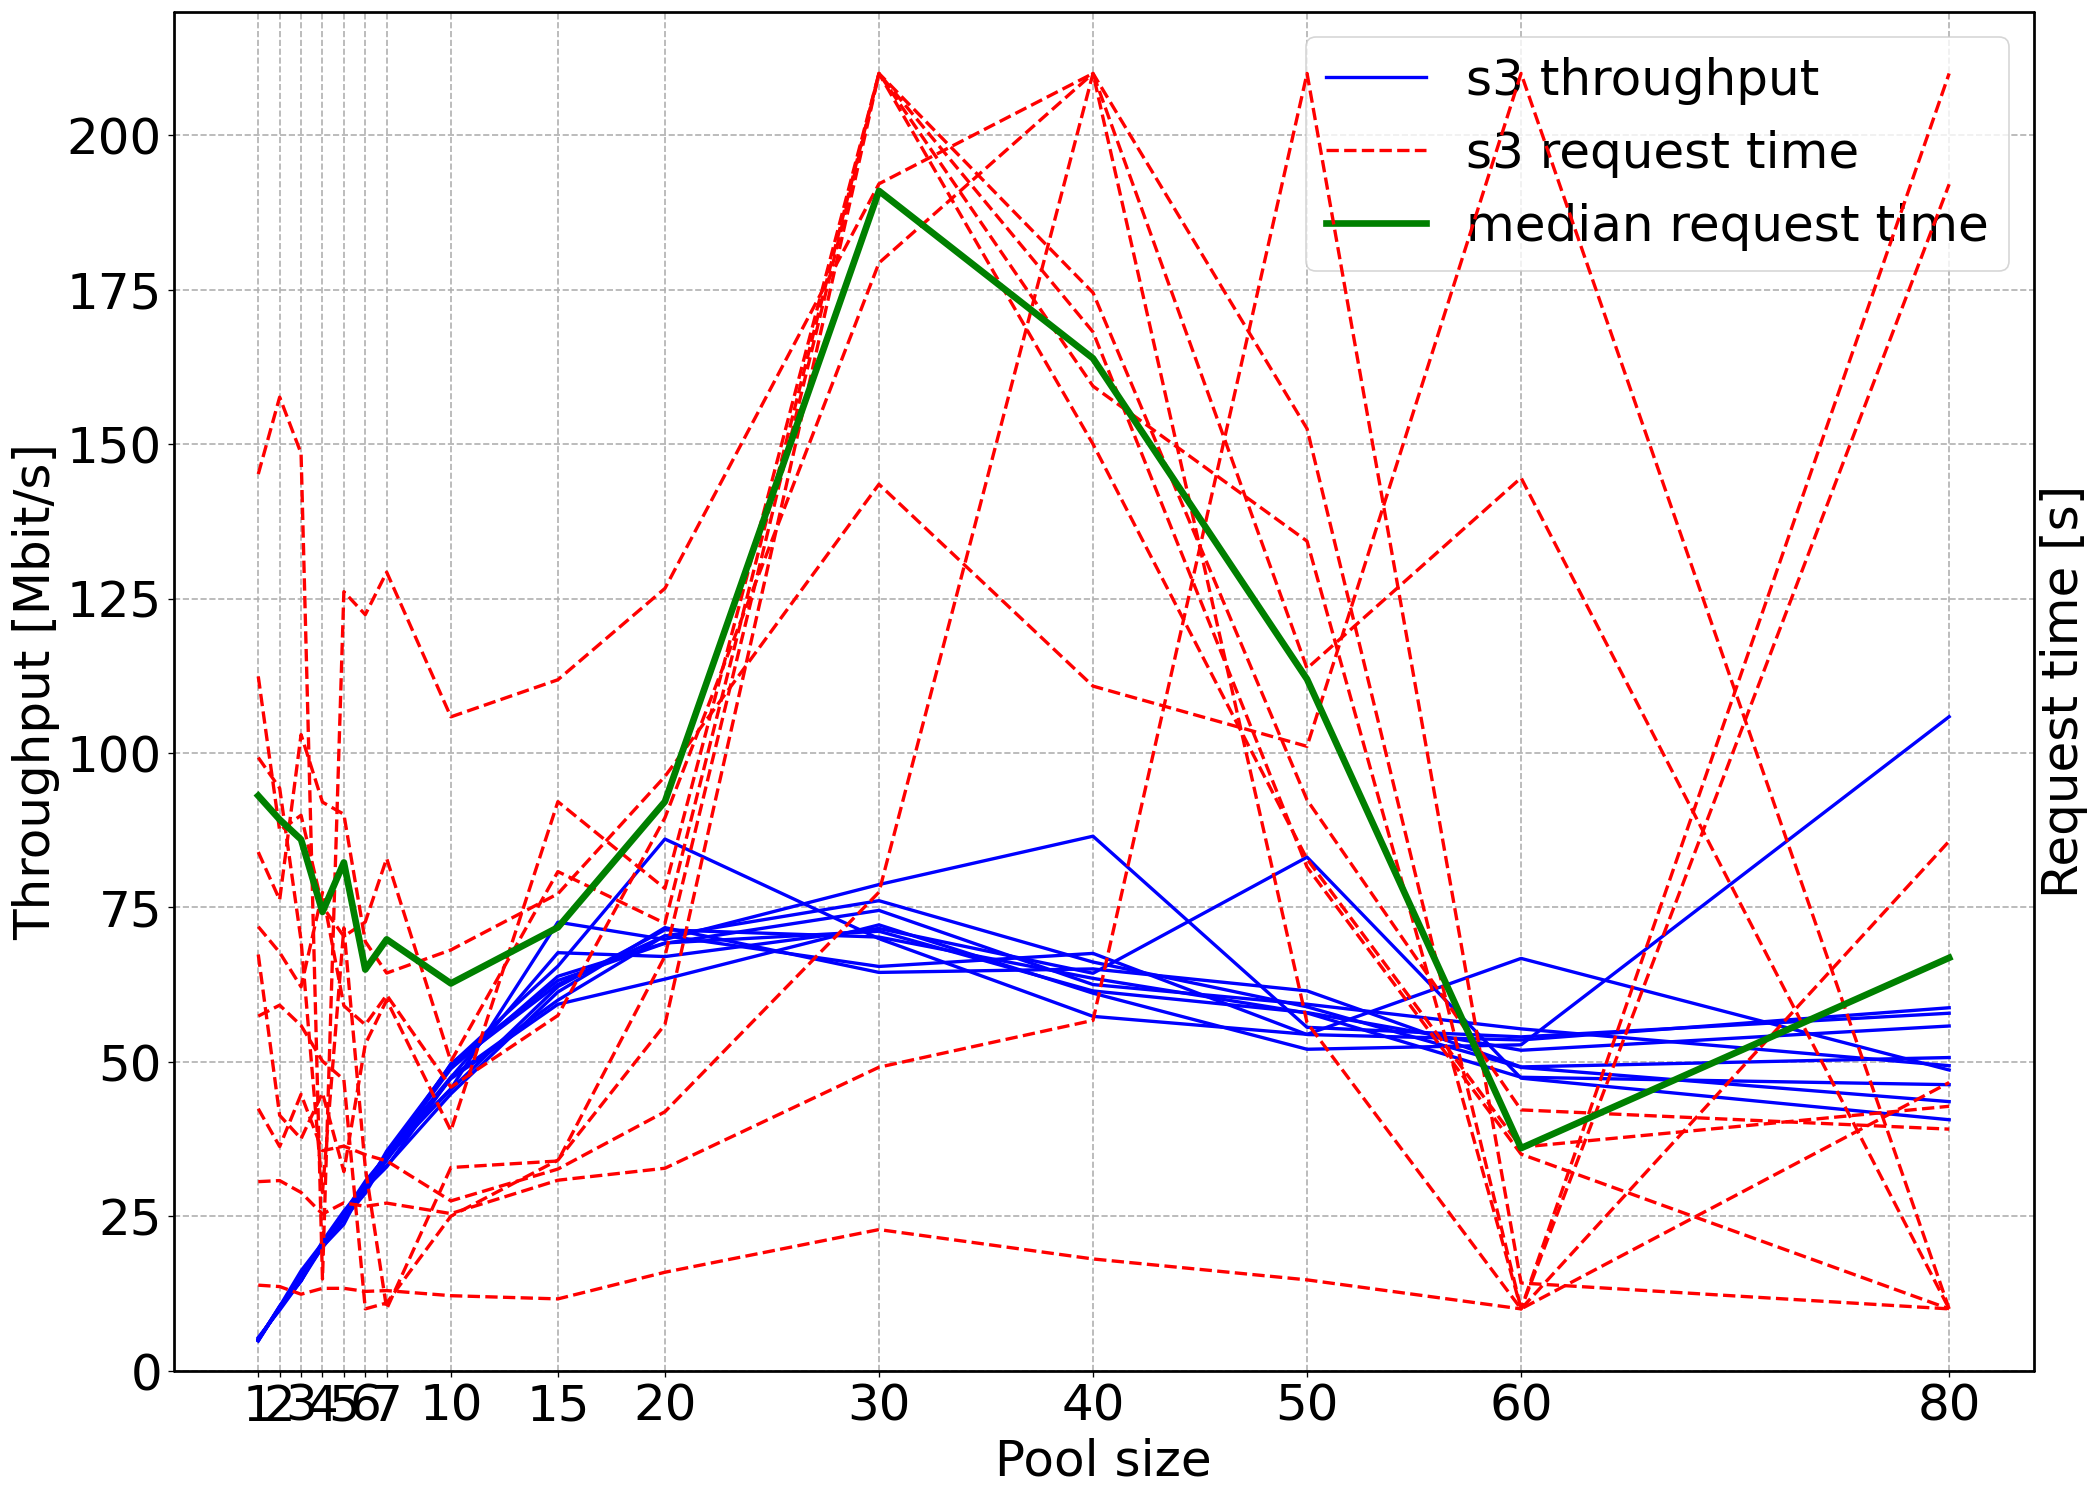

In [235]:
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'figure.figsize': (15,6)})
thr, fig_s3 = plot_throughput_per_storage2(df_datasets_s3, "s3", group_by_dataset, request_time=True, params=params)

In [236]:
thr

[{'dataset': 's3',
  'throughput': dataset  pool_size
  s3       1             4.964242
           2            10.402178
           3            16.157597
           4            20.679913
           5            24.749846
           6            29.579614
           7            34.961197
           10           47.517537
           15           59.981042
           20           70.423138
           30           65.435039
           40           67.549602
           50           54.412225
           60           53.539737
           80           58.750850
  Name: throughput [Mbit/s], dtype: float64,
  'median_request_time': dataset  pool_size
  s3       1            0.164050
           2            0.161599
           3            0.161243
           4            0.161941
           5            0.160741
           6            0.162684
           7            0.163356
           10           0.161366
           15           0.166380
           20           0.165056
           30    

In [237]:
df_datasets_scratch = []
for i in range(1, 11):
    df_dataset = extract_pandas(output_base_folder, folder_filter=f"run_scr_{i}/*dataset*")
    df_datasets_scratch.append(df_dataset)
    print(df_dataset.groupby(group_by_dataset).groups.keys())
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 775/775 [00:01<00:00, 566.66it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 811/811 [00:01<00:00, 666.75it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 764/764 [00:01<00:00, 542.54it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 763/763 [00:01<00:00, 596.16it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 777/777 [00:01<00:00, 623.44it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 803/803 [00:01<00:00, 623.36it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 785/785 [00:01<00:00, 650.31it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 777/777 [00:01<00:00, 656.32it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 780/780 [00:01<00:00, 652.30it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 844/844 [00:01<00:00, 768.74it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


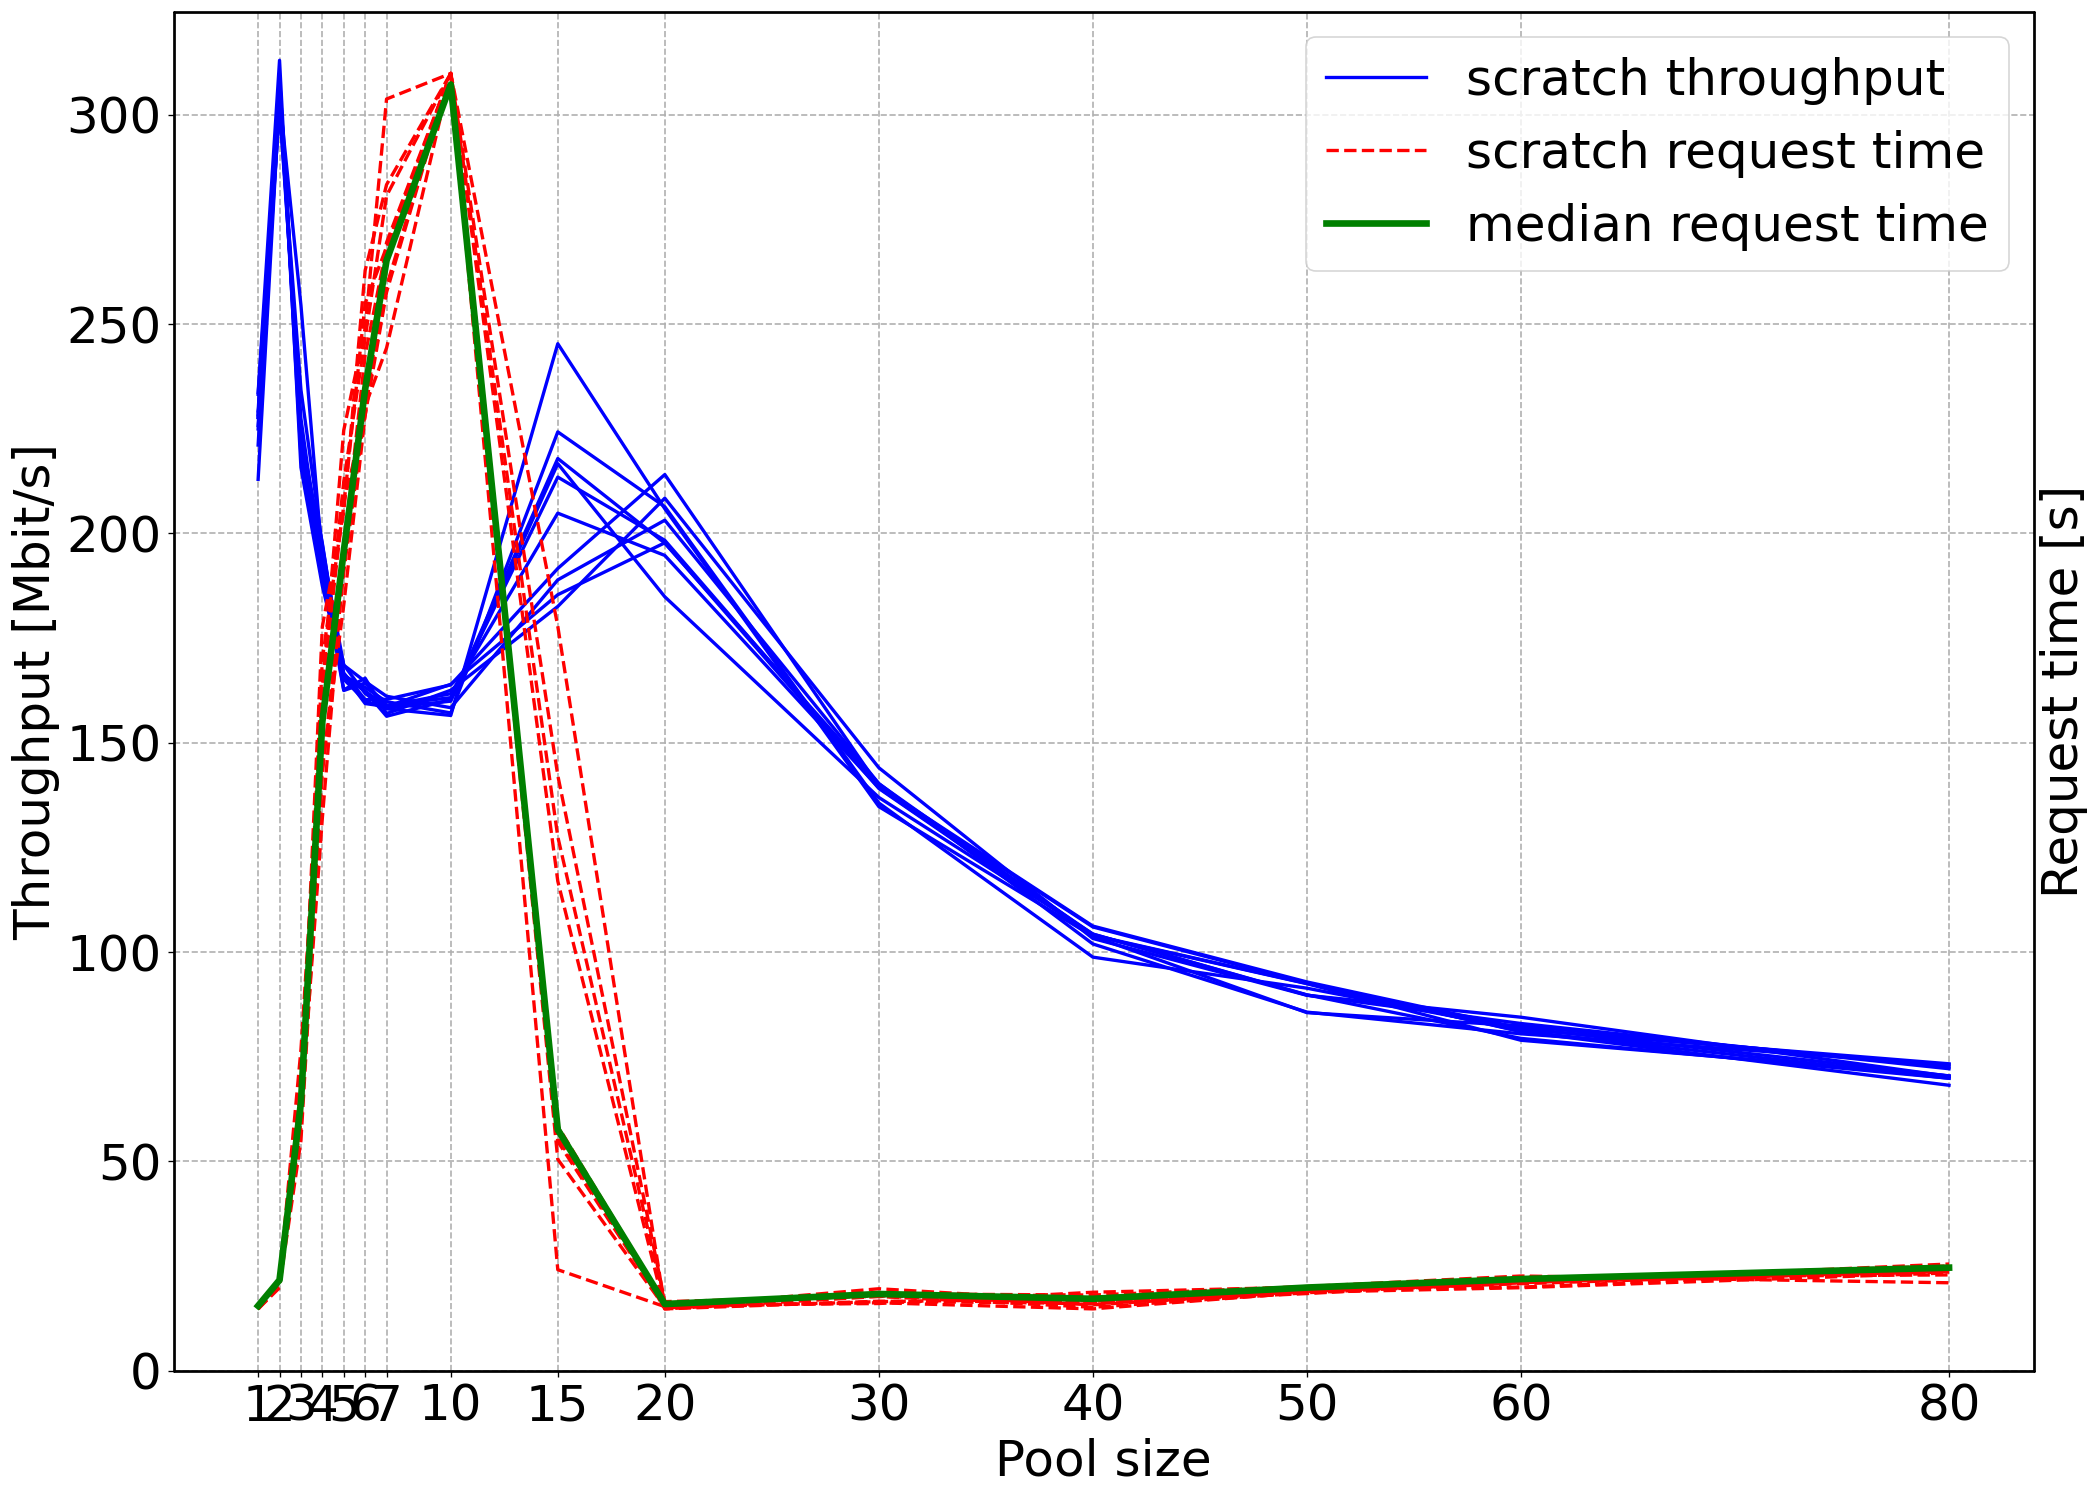

In [238]:
thr, fig_scratch = plot_throughput_per_storage2(df_datasets_scratch, "scratch", group_by_dataset, request_time=True)

In [240]:
fig_s3.savefig(f"dataset_s3.pdf", bbox_inches='tight')
fig_scratch.savefig(f"dataset_scratch.pdf", bbox_inches='tight')